This script is written to get atmospheric data (pressure, temperature, etc., as a function of altitude, from a local data file.  The data is then plotted, and fit with a user-defined function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Define a user funcion for fitting the data.

In [7]:
def fitfunction(x,*par):
    return par[0]+par[1]*x+par[2]*x**2

Define python arrays to store the data.

In [8]:
altitude = []
temp = []
gravity = []
pressure = []
density = []
viscosity = []

Read data from the filem and store in the above python arrays.

In [23]:
npoints = 0
with open('density.txt') as f:
    for line in f:
        npoints=npoints+1
        data = line.split()
        altitude.append(float(data[0]))
        temp.append(float(data[1]))
        gravity.append(float(data[2]))
        pressure.append(float(data[3]))
        density.append(float(data[4]))
        viscosity.append(float(data[5]))

print(gravity[0])
        

9.807


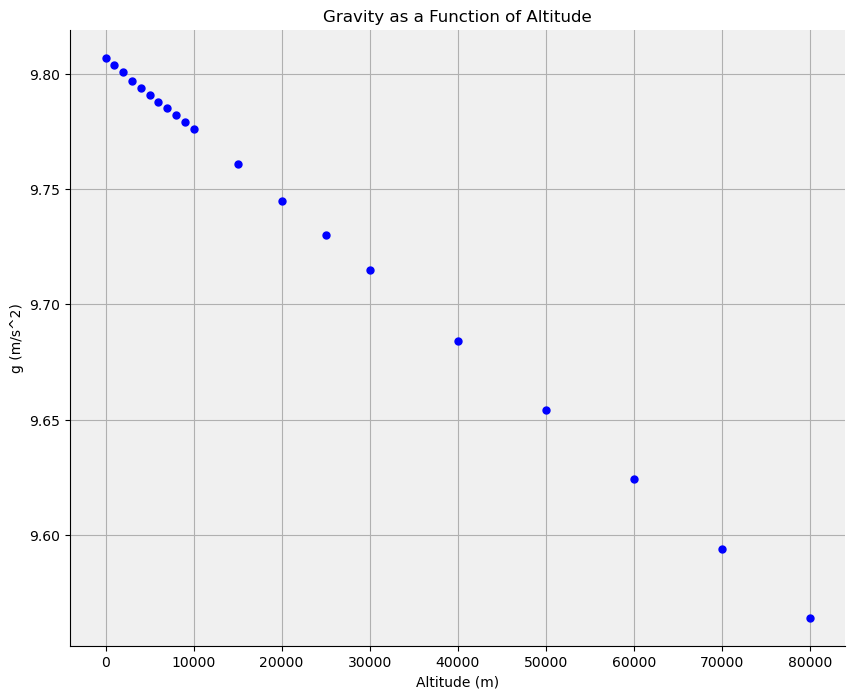

In [17]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
plt.plot(altitude, gravity, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color)

# Set the plot title and axis labels
plt.title("Gravity as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("g (m/s^2)")
plt.yscale("linear")

Fit the data with the pre-defined function

In [19]:
from scipy.optimize import curve_fit

init_vals = [12.0,-0.0001, -0.000001]
popt, pcov = curve_fit(fitfunction, altitude, gravity, p0=init_vals)

print (popt)
print (pcov)

[ 9.80672423e+00 -3.08857945e-06  6.93437242e-13]
[[ 1.25125933e-08 -8.28183870e-13  9.31404140e-18]
 [-8.28183870e-13  9.89747226e-17 -1.27604764e-21]
 [ 9.31404140e-18 -1.27604764e-21  1.77179005e-26]]


In [20]:
yfit = []
chi2=0
for i in range (0,npoints):
    yfit.append(fitfunction(altitude[i],*popt))
    chi2 += (gravity[i]-yfit[i])*(gravity[i]-yfit[i])

print ("Chi^2 / dof = %.3E / %d" % (chi2,npoints-len(init_vals)))

Chi^2 / dof = 1.399E-06 / 17


Draw the graph

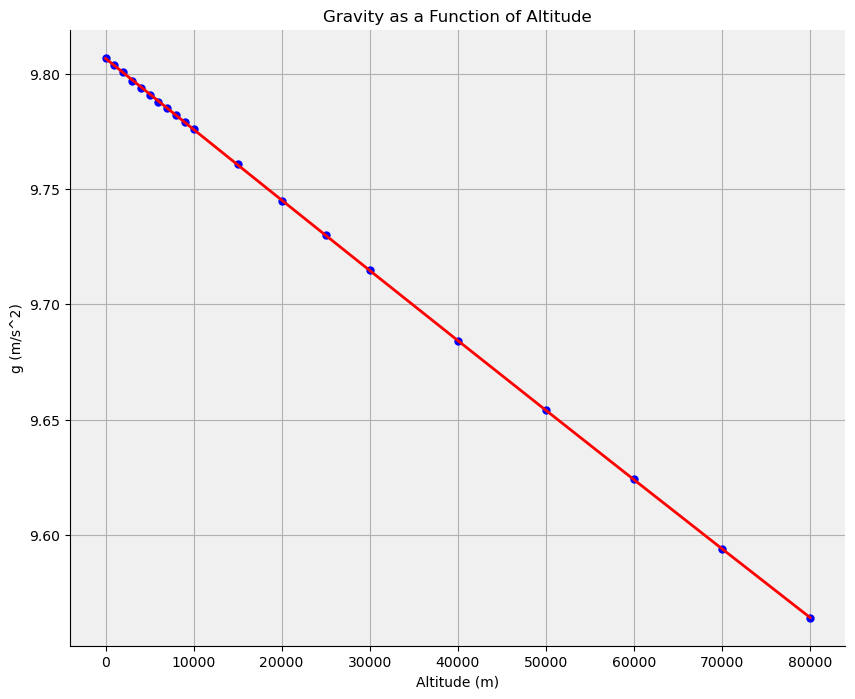

In [22]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
plt.plot(altitude, gravity, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color)
plt.plot(altitude,yfit,color='r', linewidth=2)

# Set the plot title and axis labels
plt.title("Gravity as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("g (m/s^2)")
plt.yscale("linear")

In [24]:
print(f"Slope from fit = {popt[1]}")

Slope from fit = -3.0885794461054227e-06
